# Titanic Dataset Investigation

## Introduction
This Jupyter Notebook investigates the Titanic dataset provided by Kaggle. To begin with, the dataset is loaded into a Pandas Dataframe, and its first few records are viewed.
_Note:_ `skiprows=[0]` and `names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age', 'n_siblings', 'n_parents', 'ticket_id', 'fare', 'cabin', 'port']` are used to replace predefined header with my custom header.

In [2]:
import csv
import pandas as pd
titanic_df = pd.read_csv('titanic.csv', quoting=csv.QUOTE_MINIMAL, skiprows=[0],
                         names=['passenger_id', 'survived', 'class', 'name', 'sex', 'age',
                                'n_siblings', 'n_parents', 'ticket_id', 'fare', 'cabin', 'port'])
titanic_df.head()

,passenger_id,survived,class,name,sex,age,n_siblings,n_parents,ticket_id,fare,cabin,port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Survivors
The dataset provides details of passengers aboard Titanic, and wether or not they survived. Objective of this investigation is to determine chances of survival of a passenger based on their age, sex, class, number of siblings and parents aboard. Survivors are identified using `survived` attribute with values `0` and `1`, representing non survivors and survivors respectively.

### Survival based on Age

In [3]:
survivors = titanic_df.groupby('survived')['age']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

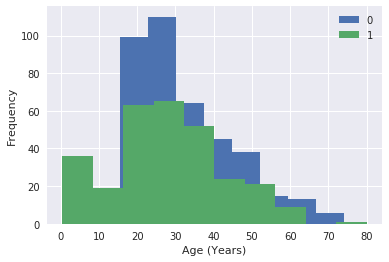

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
survivors.plot(kind='hist', legend=True)

From the results it can be concluded that age is not a determining factor for survival as the shape of the histogram is almost the same for both survivors and non survivors with the exception of children. It is interesting to note that all passengers under age 16 (approximately) survived.

### Survival based on Gender

In [6]:
survivors = titanic_df.groupby('survived')['sex']
survivors.describe()

,count,unique,top,freq
survived,,,,
0,549,2,male,468
1,342,2,female,233


From the table, it can be concluded that more males survived than females. But this is not a determining factor as there was more males aboard than females.

### Survival based on Class

In [14]:
survivors = titanic_df.groupby('survived')['class']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


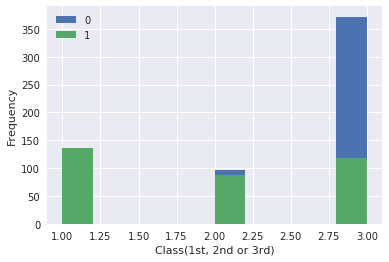

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survivors.plot(kind='hist', legend=True)
plt.xlabel('Class(1st, 2nd or 3rd)')

From the results, it can be concluded that first and second class passengers had higher chances of survival than third class passengers.

### Survival based on Number of Siblings aboard

In [25]:
survivors = titanic_df.groupby('survived')['n_siblings']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,0.553734,1.288399,0.0,0.0,0.0,1.0,8.0
1,342.0,0.473684,0.708688,0.0,0.0,0.0,1.0,4.0


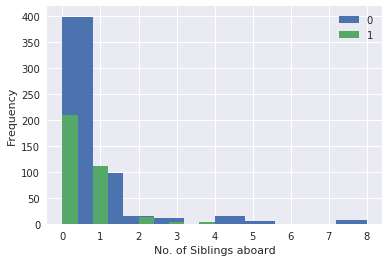

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survivors.plot(kind='hist', legend=True)
plt.xlabel('No. of Siblings aboard')

From the results, it can be concluded that chances of survival was high for passengers having siblings aboard with them, compared to passengers having no siblings aboard with them. The graph clearly shows that passengers with siblings aboard survived compared to passengers with no siblings aboard.

### Survival based on Parents aboard

In [27]:
survivors = titanic_df.groupby('survived')['n_parents']
survivors.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,0.329690,0.823166,0.0,0.0,0.0,0.0,6.0
1,342.0,0.464912,0.771712,0.0,0.0,0.0,1.0,5.0


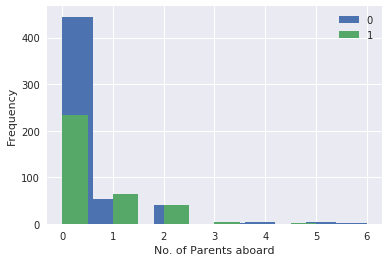

In [28]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

survivors.plot(kind='hist', legend=True)
plt.xlabel('No. of Parents aboard')

From the results it can be concluded that passengers with parents aboard had higher chances of survival than passengers without parents aboard with them. The graph clearly shows that passengers with either one or both of their parents survived; whereas many passengers without their parents aboard didn't survive.

## Conclusion
From the analysis, it can be concluded that factors that determines a passengers survival based on the given dataset are:
  * Class the passenger is travelling
  * Number of siblings aboard with the passenger
  * Wether or not parents the passenger was accompanied by parents

However, factors that don't determine a passengers chances of survival are:
  * Age of the passenger
  * Gender of the passenger
  
These conclusions are however not final due to presence of correlated and missing data. For example, most tables have a `count` value of `342` for survived passengers and `549` for non survived passengers; except for age table which reports different values. This is because many age values are missing. Also, it is interesting to note that all passengers below age 16 (approximately) survived; so did passengers with parents accompanied. These data are correlated as passengers 